# 1. Introduction  
Cuộc thi này nhằm dự đoán lợi nhuận cao trong tương lai của các cổ phiếu thực sự được giao dịch trên Japan Exchange Group, Inc. (JPX).


# 2. Table of Contents  
- [Exploratory Data Analysis (EDA)]
- [jpx_tokyo_market_prediction](#jpx_tokyo_market_prediction)
- [Create models and submit data](#Create-models-and-submit-data)

## 2.1. Exploratory Data Analysis (EDA)

In [1]:
# install talib without internet
!pip install ../input/talib-0419/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl

Processing /kaggle/input/talib-0419/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl
talib-binary is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


- Loading Modules

In [1]:
import numpy as np
import pandas as pd
import talib
import torch
import torch.nn as nn
import torch.nn.functional as F

- Check the data


In [2]:
stock_prices = pd.read_csv("../input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv")

In [8]:
print('Số hàng, số cột =', stock_prices.shape)
stock_prices.info()

Số hàng, số cột = (2332531, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [9]:
stock_prices.describe()

,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,2.332531e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.324923e+06,2.332531e+06,2.332531e+06,18865.000000,2.332293e+06
mean,5.894835e+03,2.594511e+03,2.626540e+03,2.561227e+03,2.594023e+03,6.919366e+05,1.000508e+00,22.017730,4.450962e-04
std,2.404161e+03,3.577192e+03,3.619363e+03,3.533494e+03,3.576538e+03,3.911256e+06,6.773040e-02,29.882453,2.339879e-02
min,1.301000e+03,1.400000e+01,1.500000e+01,1.300000e+01,1.400000e+01,0.000000e+00,1.000000e-01,0.000000,-5.785414e-01
25%,3.891000e+03,1.022000e+03,1.035000e+03,1.009000e+03,1.022000e+03,3.030000e+04,1.000000e+00,5.000000,-1.049869e-02
50%,6.238000e+03,1.812000e+03,1.834000e+03,1.790000e+03,1.811000e+03,1.071000e+05,1.000000e+00,15.000000,0.000000e+00
75%,7.965000e+03,3.030000e+03,3.070000e+03,2.995000e+03,3.030000e+03,4.021000e+05,1.000000e+00,30.000000,1.053159e-02
max,9.997000e+03,1.099500e+05,1.105000e+05,1.072000e+05,1.095500e+05,6.436540e+08,2.000000e+01,1070.000000,1.119512e+00


* Thông tin file`stock_price.csv`
*  `SecuritiesCode` ... Mã chứng khoán
*   `Open` ... Giá mở cửa
*  `High` ... Giá cao nhất trong ngày
*  `Low` ... Giá thấp nhất trong ngày
*  `Close` ... Giá đóng cửa
*  `Volume` ... khối lượng giao dịch (số lượng cổ phiếu được giao dịch trong một ngày)
*  `AdjustmentFactor` ... Được sử dụng để tính giá cổ phiếu lý thuyết và khối lượng giao dịch tại thời điểm chia tách / sáp nhập
*  `ExpectedDividend` ... Giá trị cổ tức dự kiến ​​vào ngày giao dịch không hưởng quyền
*  `SupercisionFlag` ... Đánh dấu cho các cổ phiếu bị giám sát và hủy niêm yết
*  `Target` ... Thay đổi tỷ lệ giá đóng cửa, ngày hôm sau so với ngày hôm trước  
  

# Sử dụng API jpx_tokyo_market_prediction

Tạo môi trường, chỉ chạy 1 lần

***
```python
import jpx_tokyo_market_prediction
env = jpx_tokyo_market_prediction.make_env()
iter_test = env.iter_test()
```



***
```Python
count = 0
for (prices, options, financials, trades, secondary_prices, sample_prediction) in iter_test:
    print(prices.head())
    env.predict(sample_prediction)
    count += 1
    break
```

```
This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
         Date          RowId  SecuritiesCode    Open    High     Low   Close  \
0  2021-12-06  20211206_1301            1301  2982.0  2982.0  2965.0  2971.0   
1  2021-12-06  20211206_1332            1332   592.0   599.0   588.0   589.0   
2  2021-12-06  20211206_1333            1333  2368.0  2388.0  2360.0  2377.0   
3  2021-12-06  20211206_1375            1375  1230.0  1239.0  1224.0  1224.0   
4  2021-12-06  20211206_1376            1376  1339.0  1372.0  1339.0  1351.0   

    Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  
0     8900               1.0               NaN            False  
1  1360800               1.0               NaN            False  
2   125900               1.0               NaN            False  
3    81100               1.0               NaN            False  
4     6200               1.0               NaN            False  
```

Thông tin các file
*  `price` ... Dữ liệu cho từng cổ phiếu vào ngày mục tiêu. Giống như stock_price.csv không có Target. 
*  `options` ... Thông tin tương tự như options.csv cho ngày mục tiêu.
*  `financials` ... Thông tin tương tự như Financials.csv cho ngày mục tiêu.
*  `trades` ... Thông tin tương tự như trades.csv cho ngày mục tiêu.
*  `secondary_prices` ... Giống thông tin trong file secandary_stock_price.csv cho ngày mục tiêu
*  `sample_prediction` ... Giống thông tin trong file sample_prediction.csv cho ngày mục tiêu。

Bằng cách này, bạn có thể sử dụng `jpx_tokyo_market_prediction` để gọi 2000 cổ phiếu vào ngày mục tiêu mỗi ngày, đưa ra dự đoán với mô hình đã tạo và tạo dữ liệu gửi với env.predict để nhận dự báo cho từng điểm dữ liệu.

## Data processing
- Xử lý mising
- Gán lại nhãn
- Định dạng lại các trường dữ liệu

Đầu tiên, chuyển đổi Nan của stock_price_df thành 0, bool thành kiểu int, *`Date`* thành kiểu datetime.

In [3]:
stock_prices['ExpectedDividend'] = stock_prices['ExpectedDividend'].fillna(0)
stock_prices['SupervisionFlag'] = stock_prices['SupervisionFlag'].map({True: 1, False: 0})
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype         
---  ------            -----         
 0   RowId             object        
 1   Date              datetime64[ns]
 2   SecuritiesCode    int64         
 3   Open              float64       
 4   High              float64       
 5   Low               float64       
 6   Close             float64       
 7   Volume            int64         
 8   AdjustmentFactor  float64       
 9   ExpectedDividend  float64       
 10  SupervisionFlag   int64         
 11  Target            float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 213.5+ MB


## Kiểm tra missing
Xóa một số dòng bị missing

In [5]:
stock_prices = stock_prices.dropna(how='any')
# Xác định thông tin missing
stock_price_df_na = (stock_prices.isnull().sum() / len(stock_prices)) * 100
stock_price_df_na = stock_price_df_na.drop(stock_price_df_na[stock_price_df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :stock_price_df_na})
missing_data.head(22)

,Missing Ratio


In [4]:
def get_talib_features(df):
    """
    Get technical features from TA-Lib
    """
    op = df['Open']
    hi = df['High']
    lo = df['Low']
    cl = df['Close']
    vo = df['Volume']
    
    # Overlap Studies
    df['BBANDS_upper'], df['BBANDS_middle'], df['BBANDS_lower'] = talib.BBANDS(cl, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    df['DEMA'] = talib.DEMA(cl, timeperiod=30)
    df['EMA'] = talib.EMA(cl, timeperiod=30)
    df['HT_TRENDLINE'] = talib.HT_TRENDLINE(cl)
    df['KAMA'] = talib.KAMA(cl, timeperiod=30)
    df['MA'] = talib.MA(cl, timeperiod=30, matype=0)
    df['MIDPOINT'] = talib.MIDPOINT(cl, timeperiod=14)
    df['SAR'] = talib.SAR(hi, lo, acceleration=0, maximum=0)
    df['SAREXT'] = talib.SAREXT(hi, lo, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
    df['SMA'] = talib.SMA(cl, timeperiod=30)
    df['T3'] = talib.T3(df['Close'], timeperiod=5, vfactor=0)
    df['TEMA'] = talib.TEMA(df['Close'], timeperiod=30)
    df['TRIMA'] = talib.TRIMA(df['Close'], timeperiod=30)
    df['WMA'] = talib.WMA(df['Close'], timeperiod=30)
    
    # Momentum Indicators
    df['ADX'] = talib.ADX(hi, lo, cl, timeperiod=14)
    df['ADXR'] = talib.ADXR(hi, lo, cl, timeperiod=14)
    df['APO'] = talib.APO(cl, fastperiod=12, slowperiod=26, matype=0)
    df['AROON_down'], df['AROON_up'] = talib.AROON(hi, lo, timeperiod=14)
    df['AROONOSC'] = talib.AROONOSC(hi, lo, timeperiod=14)
    df['BOP'] = talib.BOP(op, hi, lo, cl)
    df['CCI'] = talib.CCI(hi, lo, cl, timeperiod=14)
    df['DX'] = talib.DX(hi, lo, cl, timeperiod=14)
    df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = talib.MACD(cl, fastperiod=12, slowperiod=26, signalperiod=9)
    df['MFI'] = talib.MFI(hi, lo, cl, vo, timeperiod=14)
    df['MINUS_DI'] = talib.MINUS_DI(hi, lo, cl, timeperiod=14)
    df['MINUS_DM'] = talib.MINUS_DM(hi, lo, timeperiod=14)
    df['MOM'] = talib.MOM(cl, timeperiod=10)
    df['PLUS_DI'] = talib.PLUS_DI(hi, lo, cl, timeperiod=14)
    df['PLUS_DM'] = talib.PLUS_DM(hi, lo, timeperiod=14)
    df['RSI'] = talib.RSI(cl, timeperiod=14)
    df['STOCH_slowk'], df['STOCH_slowd'] = talib.STOCH(hi, lo, cl, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['STOCHF_fastk'], df['STOCHF_fastd'] = talib.STOCHF(hi, lo, cl, fastk_period=5, fastd_period=3, fastd_matype=0)
    df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = talib.STOCHRSI(cl, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    df['TRIX'] = talib.TRIX(cl, timeperiod=30)
    df['ULTOSC'] = talib.ULTOSC(hi, lo, cl, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    df['WILLR'] = talib.WILLR(hi, lo, cl, timeperiod=14)
    
    # Volume Indicators
    df['AD'] = talib.AD(hi, lo, cl, vo)
    df['ADOSC'] = talib.ADOSC(hi, lo, cl, vo, fastperiod=3, slowperiod=10)
    df['OBV'] = talib.OBV(cl, vo)
    
    # Volatility Indicators
    df['ATR'] = talib.ATR(hi, lo, cl, timeperiod=14)
    df['NATR'] = talib.NATR(hi, lo, cl, timeperiod=14)
    df['TRANGE'] = talib.TRANGE(hi, lo, cl)
    
    # Cycle Indicators
    df['HT_DCPERIOD'] = talib.HT_DCPERIOD(cl)
    df['HT_DCPHASE'] = talib.HT_DCPHASE(cl)
    df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = talib.HT_PHASOR(cl)
    df['HT_SINE_sine'], df['HT_SINE_leadsine'] = talib.HT_SINE(cl)
    df['HT_TRENDMODE'] = talib.HT_TRENDMODE(cl)
    
    # Statistic Functions
    df['BETA'] = talib.BETA(hi, lo, timeperiod=5)
    df['CORREL'] = talib.CORREL(hi, lo, timeperiod=30)
    df['LINEARREG'] = talib.LINEARREG(cl, timeperiod=14) - cl
    df['LINEARREG_ANGLE'] = talib.LINEARREG_ANGLE(cl, timeperiod=14)
    df['LINEARREG_INTERCEPT'] = talib.LINEARREG_INTERCEPT(cl, timeperiod=14) - cl
    df['LINEARREG_SLOPE'] = talib.LINEARREG_SLOPE(cl, timeperiod=14)
    df['STDDEV'] = talib.STDDEV(cl, timeperiod=5, nbdev=1)   
    
    return df

In [10]:
%%time
results = stock_prices.groupby('SecuritiesCode').apply(get_talib_features)
results

CPU times: user 1min 1s, sys: 1.51 s, total: 1min 3s
Wall time: 1min 3s


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,HT_SINE_sine,HT_SINE_leadsine,HT_TRENDMODE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,0.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,0.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,0.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,0.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,0.0,...,NaN,NaN,1,NaN,NaN,-17.571429,-80.770114,62.428571,-6.153846,NaN
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,0.0,...,NaN,NaN,1,NaN,NaN,-18.914286,-72.567208,22.485714,-3.184615,NaN
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,0.0,...,NaN,NaN,1,NaN,NaN,13.542857,-81.089229,96.457143,-6.378022,NaN
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,0.0,...,NaN,NaN,1,NaN,NaN,-37.885714,-79.812685,34.457143,-5.564835,NaN


In [11]:
results = results.dropna(axis=0).reset_index(drop=True)
print(results.shape)
results.tail()

(1517476, 76)


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,HT_SINE_sine,HT_SINE_leadsine,HT_TRENDMODE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV
1517471,20211203_7337,2021-12-03,7337,637.0,642.0,634.0,641.0,371600,1.0,0.0,...,-0.053425,0.668320,0,1.123990,0.976151,-16.000000,-59.091709,5.714286,-1.670330,7.002857
1517472,20211203_7342,2021-12-03,7342,2649.0,2755.0,2600.0,2748.0,855000,1.0,0.0,...,-0.844915,-0.975677,1,1.098003,0.938691,35.000000,-89.010928,788.000000,-57.923077,178.553745
1517473,20211203_7354,2021-12-03,7354,3730.0,3845.0,3690.0,3845.0,75100,1.0,0.0,...,-0.063006,0.661150,1,0.869102,0.979441,-158.857143,-88.499504,337.428571,-38.175824,75.934182
1517474,20211203_7358,2021-12-03,7358,3060.0,3165.0,3060.0,3160.0,19700,1.0,0.0,...,-0.486774,0.273476,1,0.620796,0.977968,-186.714286,-89.205731,751.000000,-72.131868,33.376639
1517475,20211203_7944,2021-12-03,7944,4325.0,4485.0,4305.0,4485.0,72200,1.0,0.0,...,-0.085000,0.644444,1,0.589924,0.928844,-195.000000,-88.781979,416.428571,-47.032967,87.269697


In [13]:
# Thay doi thu tu cho Target xuong cuoi
columns = copy.deepcopy(results.columns)
columns = columns.tolist()
columns.remove('Target')
columns.append('Target')
results = results[columns]
results

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,HT_SINE_leadsine,HT_TRENDMODE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV,Target
0,20170515_1301,2017-05-15,1301,3010.0,3040.0,2960.0,3040.0,48800,1.0,0.0,...,0.167060,1,0.252554,0.925221,-11.000000,84.534081,-146.857143,10.450549,27.859648,0.004902
1,20170515_1332,2017-05-15,1332,536.0,596.0,533.0,594.0,9793300,1.0,0.0,...,-0.295885,1,0.000230,0.828973,-23.942857,75.133100,-72.914286,3.767033,17.701977,-0.015177
2,20170515_1333,2017-05-15,1333,3105.0,3135.0,3095.0,3130.0,256200,1.0,0.0,...,0.913696,1,0.756011,0.966814,47.142857,80.520631,-30.714286,5.989011,13.564660,-0.009331
3,20170515_1376,2017-05-15,1376,1465.0,1480.0,1465.0,1478.0,4800,1.0,0.0,...,-0.416699,1,0.561860,0.908891,10.085714,81.652732,-78.514286,6.815385,6.406247,0.008737
4,20170515_1377,2017-05-15,1377,3425.0,3500.0,3425.0,3475.0,204500,1.0,0.0,...,-0.943255,0,0.681483,0.899970,-64.857143,-83.838904,55.571429,-9.263736,33.256578,0.008746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517471,20211203_7337,2021-12-03,7337,637.0,642.0,634.0,641.0,371600,1.0,0.0,...,0.668320,0,1.123990,0.976151,-16.000000,-59.091709,5.714286,-1.670330,7.002857,0.020093
1517472,20211203_7342,2021-12-03,7342,2649.0,2755.0,2600.0,2748.0,855000,1.0,0.0,...,-0.975677,1,1.098003,0.938691,35.000000,-89.010928,788.000000,-57.923077,178.553745,0.005725
1517473,20211203_7354,2021-12-03,7354,3730.0,3845.0,3690.0,3845.0,75100,1.0,0.0,...,0.661150,1,0.869102,0.979441,-158.857143,-88.499504,337.428571,-38.175824,75.934182,0.047936
1517474,20211203_7358,2021-12-03,7358,3060.0,3165.0,3060.0,3160.0,19700,1.0,0.0,...,0.273476,1,0.620796,0.977968,-186.714286,-89.205731,751.000000,-72.131868,33.376639,0.014151


## Standardise
Sử dụng StandardScaler của sklearn để chuẩn hóa các features được sử dụng trong mô hình (ngoài RowId, Date và SecuritiesCode)

In [14]:
from sklearn.preprocessing import StandardScaler
import copy
stdsc = StandardScaler()
features = copy.deepcopy(results)
features = features.columns[3:].tolist()
features.remove('Target')
results[features] = stdsc.fit_transform(results[features])
results.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,...,HT_SINE_leadsine,HT_TRENDMODE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV,Target
0,20170515_1301,2017-05-15,1301,0.147680,0.145603,0.143993,0.156847,-0.170035,-0.009448,-0.057437,...,0.272085,0.508943,-0.759235,-0.243796,-0.081316,1.099357,-0.322961,0.294447,-0.150595,0.004902
1,20170515_1332,2017-05-15,1332,-0.606432,-0.591062,-0.604456,-0.588722,2.285379,-0.009448,-0.057437,...,-0.355671,0.508943,-1.180641,-1.660628,-0.176178,0.972469,-0.154109,0.098158,-0.256987,-0.015177
2,20170515_1333,2017-05-15,1333,0.176637,0.174238,0.185625,0.184280,-0.117775,-0.009448,-0.057437,...,1.284526,0.508943,0.081586,0.368493,0.344829,1.045186,-0.057743,0.163415,-0.300322,-0.009331
3,20170515_1376,2017-05-15,1376,-0.323259,-0.324609,-0.317042,-0.319269,-0.181122,-0.009448,-0.057437,...,-0.519496,0.508943,-0.242665,-0.484180,0.073227,1.060467,-0.166897,0.187685,-0.375299,0.008737
4,20170515_1377,2017-05-15,1377,0.274178,0.284255,0.287392,0.289440,-0.130802,-0.009448,-0.057437,...,-1.233508,-1.964858,-0.042883,-0.615508,-0.476050,-1.173238,0.139295,-0.284544,-0.094068,0.008746


# Chia dữ liệu thành 2 tập train, test

In [15]:
# Split train and valid data
train_df = results[results.Date < '2021-01-01'].copy().reset_index(drop=True)
valid_df = results[results.Date >= '2021-01-01'].copy().reset_index(drop=True)

### Chuyển dữ liệu cho từng chứng khoán ở định dạng `dict` và lưu dữ liệu đó để có thể từng chứng khoán.

In [17]:
dataset_dict_train = {}
for sc in train_df['SecuritiesCode'].unique():
    dataset_dict_train[str(sc)] = train_df[train_df['SecuritiesCode'] == sc].values[:, 3:].astype(np.float32)

print(train_df['SecuritiesCode'].unique())
print(dataset_dict_train['1301'].shape)

[1301 1332 1333 ... 4493 7094 7095]
(825, 73)


In [21]:
dataset_dict_valid = {}
for sc in valid_df['SecuritiesCode'].unique():
    dataset_dict_valid[str(sc)] = valid_df[valid_df['SecuritiesCode'] == sc].values[:, 3:].astype(np.float32)

In [22]:
print('Ví dụ 1 cổ phiếu: mã số 7342')
print('Số lượng features: ' + str(dataset_dict_valid['7342'].shape[1] - 1)) # 1 biến cuối cùng là target
print('Số quan sát: ' + str(dataset_dict_valid['7342'].shape[0]))

Ví dụ 1 cổ phiếu: mã số 7342
Số lượng features: 72
Số quan sát: 145


Sử dụng dataloader của Pytorch để gọi dữ liệu theo từng lô nhỏ.

In [23]:
from torch.utils.data.sampler import SubsetRandomSampler

class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, T=31, y=None, is_train = True):
        self.data = X
        self.y = y
        self.sequence_num = T
        self.is_train = is_train

    def __len__(self):
        return len(self.y)
        
    # idx: thứ tự dòng ~ 1 quan sát
    # idx[-1] ~ target của dòng idx

    def __getitem__(self, idx):
        out_data = self.data[idx]
        if self.is_train:
            out_label = self.y[idx[-1]]
            return out_data, out_label
        else:
            return out_data


def create_dataloader(dataset, X_rows, T=31, input_size=8, batch_size=32, shuffle=False):
    # Tạo ra 1 mảng, mỗi dòng là 31 quan sát
    # Dòng n + 1 sẽ dịch chuyển quan sát kỳ t + 1
    # Nếu giá chứng khoán có 233 ngày (no_of_rows = 233) thì sẽ tương ứng có 203 dòng trong mảng

    sampler = np.array([list(range(i, i+T)) for i in range(X_rows-T+1)])
    if shuffle == True:
        np.random.shuffle(sampler)
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size, sampler=sampler)
    return dataloader
    

In [24]:
#### Check operation dataloader ####
X_check, y_check = dataset_dict_train['1301'][:, :-1], dataset_dict_train['1301'][:, -1]
dataset_check = MyDataset(X_check, y=y_check, T=31)
dataloader_check = create_dataloader(
    dataset_check, X_check.shape[0], T=31, input_size=8, batch_size=32, shuffle=False)
for b, tup in enumerate(dataloader_check):
    print('---------')
    print(tup[0].shape, tup[1].shape)
    break


---------
torch.Size([32, 31, 72]) torch.Size([32])


## Training
Đối với mỗi cổ phiếu, tạo tập dữ liệu và huấn luyện mô hình LSTM.

## Create Model(LSTM)
** Trong phần này chúng tôi sử dụng mô hình LSTM(Long Short Term Memory)
sử dụng Pytorch 

- input_size - kích thước đầu vào = 8 ~ 8 features
    
- hidden_size - Số trạng thái ẩn tại mỗi bước thời gian, bao gồm hidden state and cell state
    
- Number of layers - số lớp LSTM được xếp chồng lên nhau

https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size=69, T=31, hidden_size =128,
                 num_layers=2, output_size=1):
        super().__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        # in_features = hidden_size*T*2, out_features = 1
        self.linear1 = nn.Linear(hidden_size*T*2, 1)
        self.bn1 = nn.BatchNorm1d(hidden_size*T*2)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        x = lstm_out.reshape(lstm_out.shape[0], -1)
        x = self.linear1(self.bn1(x))
        return x

In [26]:
# Check wheter GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Model Instantiation
model = LSTM(input_size=72, T=31, hidden_size=128, num_layers=2, output_size=1)
model.to(device)
model.train()
# Setting
epochs = 10
batch_size = 512
# setting optimizer
lr = 0.0001
weight_decay = 1.0e-05
optimizer = torch.optim.Adagrad(model.parameters(), lr=lr, weight_decay=weight_decay)
# setting criterion
criterion = nn.MSELoss()

In [29]:
from tqdm import tqdm
# set iteration counter
iteration = 0
# 
log_train = [[1],[0], [np.inf]]
for epoch in range(epochs):
    epoch_loss = 0.0
    for sc in tqdm(train_df['SecuritiesCode'].unique()):
        X, y = dataset_dict_train[str(sc)][:, :-1], dataset_dict_train[str(sc)][:, -1]
        dataset = MyDataset(X, y=y, T=31, is_train = True)
        dataloader = create_dataloader(dataset, 
                                       X.shape[0], 
                                       T=31, 
                                       input_size=8, batch_size=batch_size, shuffle=True)
        for data, targets in dataloader:
            data, targets = data.to(device), targets.to(device)
            
            optimizer.zero_grad()
            
            data = data.to(torch.float32)
            output = model.forward(data)
            targets = targets.to(torch.float32)
            
            loss = criterion(output.view(1,-1)[0], targets)            
            
            loss.backward()
            
            optimizer.step()
            
            epoch_loss += loss.item()
            
            iteration += 1
    epoch_loss = epoch_loss/iteration
    print('epoch_loss={}'.format(epoch_loss / iteration))
    log_train[0].append(epoch + 1)
    log_train[1].append(iteration)
    log_train[2].append(epoch_loss)


100%|██████████| 1920/1920 [01:14<00:00, 25.67it/s]


epoch_loss=1.856823544338261e-06


100%|██████████| 1920/1920 [01:14<00:00, 25.69it/s]


epoch_loss=3.9670221235598315e-07


100%|██████████| 1920/1920 [01:15<00:00, 25.52it/s]


epoch_loss=1.5653448978707505e-07


100%|██████████| 1920/1920 [01:14<00:00, 25.71it/s]


epoch_loss=8.031401902190698e-08


100%|██████████| 1920/1920 [01:14<00:00, 25.67it/s]


epoch_loss=4.7558221044248236e-08


100%|██████████| 1920/1920 [01:15<00:00, 25.50it/s]


epoch_loss=3.0900836626382255e-08


100%|██████████| 1920/1920 [01:15<00:00, 25.48it/s]


epoch_loss=2.1393824389988755e-08


100%|██████████| 1920/1920 [01:14<00:00, 25.66it/s]


epoch_loss=1.5546163562825903e-08


100%|██████████| 1920/1920 [01:14<00:00, 25.63it/s]


epoch_loss=1.1706625210639746e-08


100%|██████████| 1920/1920 [01:14<00:00, 25.79it/s]

epoch_loss=9.075042189179838e-09


In [31]:
iteration = 0
log_valid = [[1],[0], [np.inf]]
for epoch in range(epochs):
    epoch_loss = 0.0
    with torch.no_grad():
        for sc in tqdm(valid_df['SecuritiesCode'].unique()):
            X, y = dataset_dict_valid[str(sc)][:, :-1], dataset_dict_valid[str(sc)][:, -1]
            dataset = MyDataset(X, y=y, T=31, is_train = True)
            dataloader = create_dataloader(dataset, X.shape[0], T=31, input_size=8, batch_size=batch_size, shuffle=False)
            for data, targets in dataloader:
                data, targets = data.to(device), targets.to(device)
                data = data.to(torch.float32)
                output = model.forward(data)
                targets = targets.to(torch.float32)
                loss = criterion(output.view(1,-1)[0], targets) 
                epoch_loss += loss.item()
                iteration += 1
        epoch_loss /= iteration
        print('epoch_loss={}'.format(epoch_loss))        
        log_valid[0].append(epoch + 1)
        log_valid[1].append(iteration)
        log_valid[2].append(epoch_loss)

100%|██████████| 14/14 [00:00<00:00, 181.93it/s]


epoch_loss=0.008734408466677581


100%|██████████| 14/14 [00:00<00:00, 202.18it/s]


epoch_loss=0.0043672042333387905


100%|██████████| 14/14 [00:00<00:00, 205.56it/s]


epoch_loss=0.002911469488892527


100%|██████████| 14/14 [00:00<00:00, 191.10it/s]


epoch_loss=0.0021836021166693953


100%|██████████| 14/14 [00:00<00:00, 190.90it/s]


epoch_loss=0.0017468816933355162


100%|██████████| 14/14 [00:00<00:00, 186.54it/s]


epoch_loss=0.0014557347444462635


100%|██████████| 14/14 [00:00<00:00, 186.31it/s]


epoch_loss=0.0012477726380967973


100%|██████████| 14/14 [00:00<00:00, 201.72it/s]


epoch_loss=0.0010918010583346976


100%|██████████| 14/14 [00:00<00:00, 203.70it/s]


epoch_loss=0.0009704898296308423


100%|██████████| 14/14 [00:00<00:00, 190.70it/s]

epoch_loss=0.0008734408466677581


Vẽ biểu đồ theo epoch và loss của mô hình

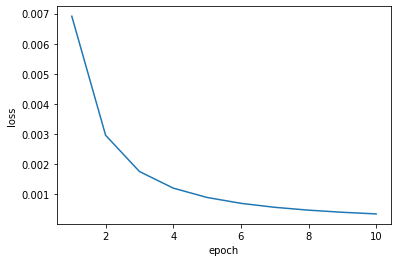

In [32]:
import matplotlib.pyplot as plt
plt.plot(log_train[0][1:], log_train[2][1:])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

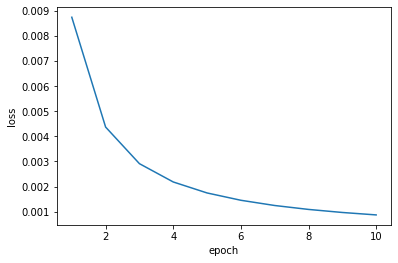

In [33]:
plt.plot(log_valid[0][1:], log_valid[2][1:])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Prediction
Sử dụng mô hình đã được huấn luyện để dự báo.
Dự báo bằng cách chuyển đổi dữ liệu từ `DataFrame` →` Ndarray` → `tensor`.

In [35]:
from datetime import datetime
def predict(model, X_df, sequence=31):
    pred_df = X_df[['Date', 'SecuritiesCode']]
    # groupby nhóm là lấy ra từng chứng khoán
    code_group = X_df.groupby('SecuritiesCode')
    X_all = np.array([])
    for sc, group in code_group:
        # Chuẩn hóa dữ liệu
        group_std = stdsc.transform(group[features])
        #
        X = dataset_dict_valid[str(sc)][-1*(sequence-1):, :-1]
        # Kết hợp
        X = np.vstack((X, group_std))
        X_all = np.append(X_all, X)
    X_all = X_all.reshape(-1, sequence, X.shape[1])
    y_pred = np.array([])
    for it in range(X_all.shape[0]//512+1):
        data = X_all[it*512:(it+1)*512]
        data = torch.from_numpy(data.astype(np.float32)).clone()
        data = data.to(torch.float32)
        data = data.to(device)
        output = model.forward(data)
        output = output.view(1, -1)
        output = output.to('cpu').detach().numpy().copy()
        y_pred = np.append(y_pred, output[0])
    pred_df['target'] = y_pred
    pred_df['Rank'] = pred_df["target"].rank(ascending=False,method="first") -1
    pred_df['Rank'] = pred_df['Rank'].astype(int)
    pred_df = pred_df.drop('target', axis=1)
    return pred_df

test_X_df = valid_df[valid_df['Date'] == datetime(2021, 12, 3)].drop('Target', axis=1)
y_pred = predict(model, test_X_df)
print(y_pred.shape)
print(y_pred)

(13, 3)
           Date  SecuritiesCode  Rank
2190 2021-12-03            2987     5
2191 2021-12-03            4165     8
2192 2021-12-03            4167    10
2193 2021-12-03            4168     9
2194 2021-12-03            4169     6
2195 2021-12-03            4934     4
2196 2021-12-03            6612     1
2197 2021-12-03            7092    12
2198 2021-12-03            7337     0
2199 2021-12-03            7342    11
2200 2021-12-03            7354     2
2201 2021-12-03            7358     7
2202 2021-12-03            7944     3


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

# Tài liệu tham khảo

https://blog.floydhub.com/long-short-term-memory-from-zero-to-hero-with-pytorch/